In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import joblib
import pickle

In [72]:
# load the data set
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
# info about the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
# data cleaning
# glucose, BP, insulin, skin thickness, BMI - replace 0 with NaN

# create a copy of the dataset
clean_diabetes = diabetes_data.copy()

# choose which columns need to be replace
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
clean_diabetes[columns]= clean_diabetes[columns].replace({0 : np.nan})

In [76]:
clean_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [77]:
clean_diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

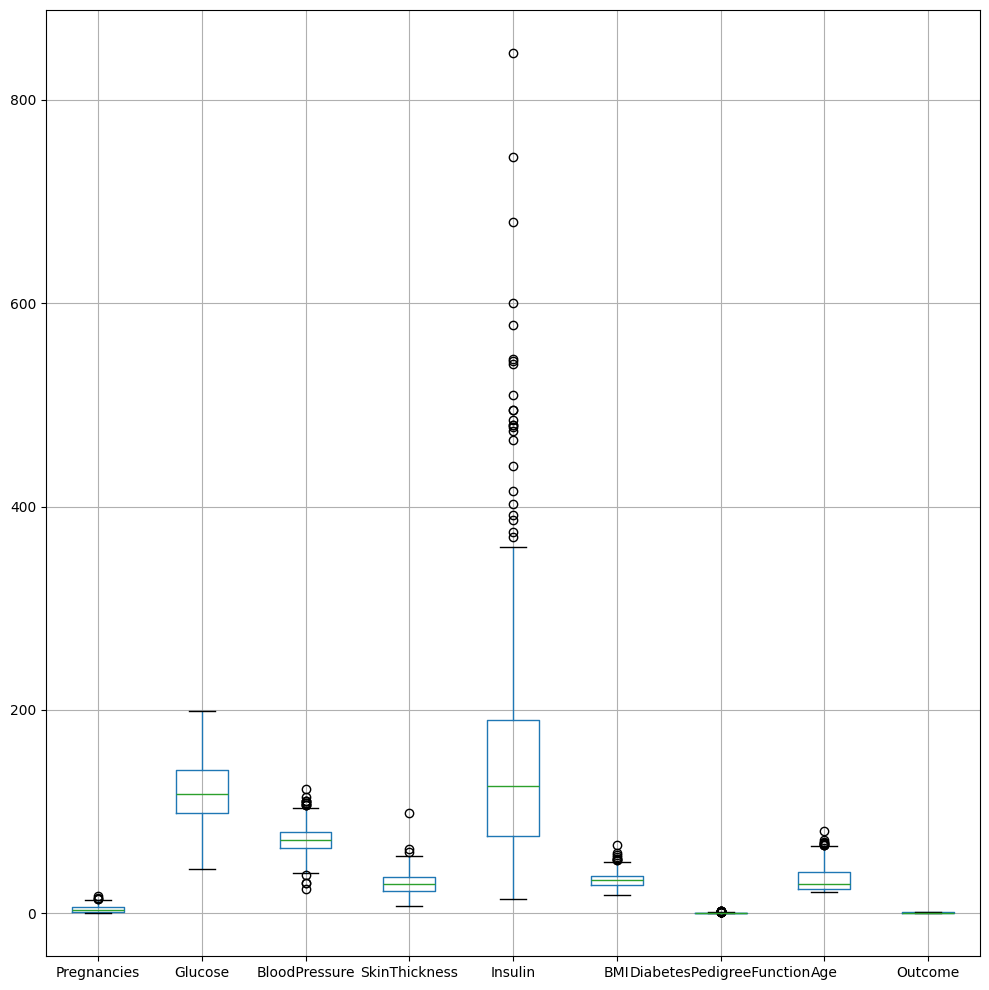

In [78]:
clean_diabetes.boxplot(figsize=(10,10))
plt.tight_layout()
plt.show()

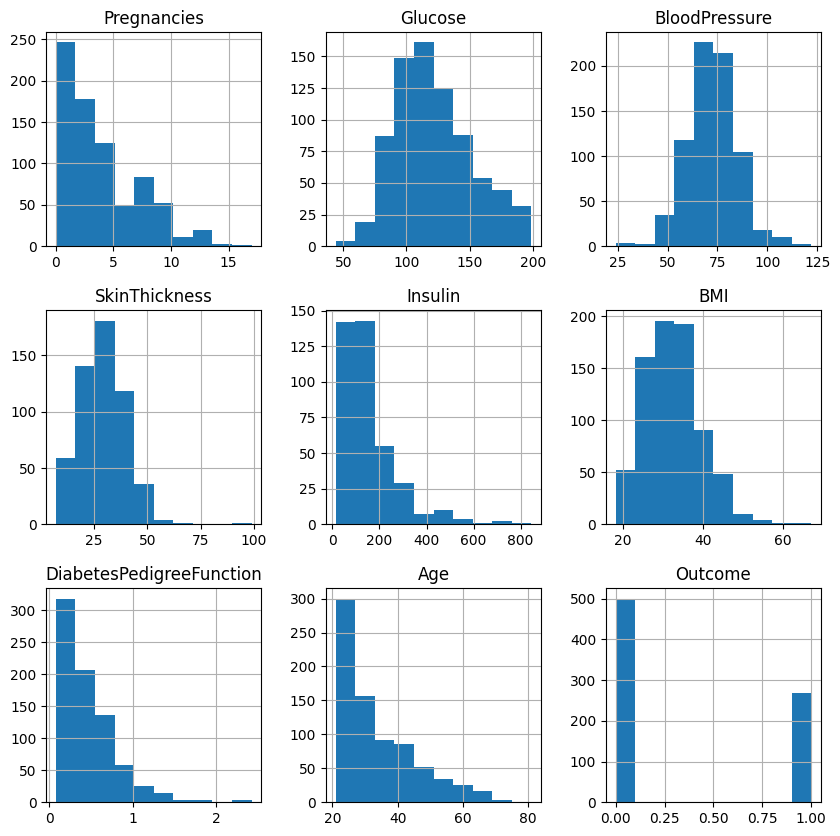

In [79]:
# create a histogram
clean_diabetes.hist(bins=10, figsize=(10, 10))
plt.show()

In [80]:
# glucose, BP, skin thickness has a normal distribution, so can replace with the mean
# insulin and BMI is skewed, so replace with median
# filling glucose, blood pressure with mean
# filling skin thickness and insulin and BMI with median

clean_diabetes['Glucose'] = clean_diabetes['Glucose'].fillna(clean_diabetes['Glucose'].mean())
clean_diabetes['BloodPressure'] = clean_diabetes['BloodPressure'].fillna(clean_diabetes['BloodPressure'].mean())
clean_diabetes['SkinThickness'] = clean_diabetes['SkinThickness'].fillna(clean_diabetes['SkinThickness'].median())
clean_diabetes['Insulin'] = clean_diabetes['Insulin'].fillna(clean_diabetes['Insulin'].median())
clean_diabetes['BMI'] = clean_diabetes['BMI'].fillna(clean_diabetes['BMI'].median())

In [81]:
clean_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [82]:
# counting the number of diabetic and non diabetic
# check if the data set is balanced or not
clean_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

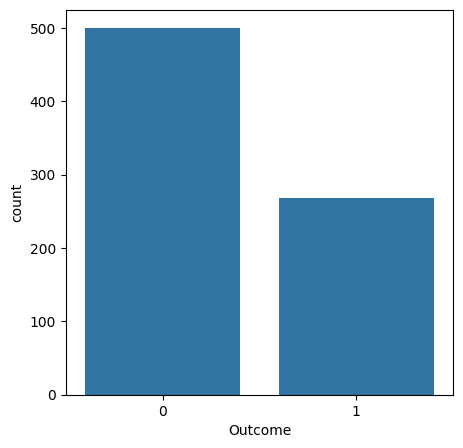

In [83]:
# plot a chart
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data = clean_diabetes)
plt.show()

In [84]:
# correlation heatmap
plt.figure(figsize=(10,10))


<Figure size 1000x1000 with 0 Axes>

In [85]:
# independent and dependent variables
x = clean_diabetes.iloc[:, :-1]
y = clean_diabetes.iloc[:, -1]


In [86]:
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=32)

In [87]:
# feature scaling
# Fit scaler on training data
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)  # Fit and transform training data
x_test_scaled = sc.transform(x_test)  # Only transform, do not fit again

# Train your model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

# Save the scaler and the model
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)  # Save the fitted scaler

with open('logreg_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)  # Save the trained model

print("Scaler and model saved successfully!")

Scaler and model saved successfully!


In [88]:
y_pred = logreg.predict(x_test_scaled)

In [89]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
642,1,0
695,1,0
453,0,0
565,0,0
99,1,1
...,...,...
455,1,1
354,0,0
216,1,0
509,0,0
